In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import datetime as dat
import matplotlib as plt
import datetime as dt
import xgboost as xgb
%matplotlib inline
sns.set()

In [2]:
matriz = pd.read_csv('../xgb/training_set_sc.csv').set_index('ref_hash')

In [3]:
features = matriz.iloc[:,:-1]
labels = matriz.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=features,label=labels)

/usr/local/lib/python2.7/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python2.7/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [4]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, test_size=0.25, random_state=123)

In [5]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.3, learning_rate = 0.055,
                max_depth = 15, alpha = 10, num_boost_round = 50, gamma = 10,
                          n_jobs = 10, n_estimators = 89, nfolds =10 )

In [6]:
xg_reg.fit(train_features,train_labels)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=10, importance_type='gain',
       learning_rate=0.055, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=89, n_jobs=10,
       nfolds=10, nthread=None, num_boost_round=50, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [7]:
predicted_labels = xg_reg.predict(test_features)

In [8]:
rmse = np.sqrt(mean_squared_error(test_labels, predicted_labels))
print("RMSE: %f" % (rmse))

RMSE: 51205.630110


## Importancia de los features (cuantas veces aparecen en los árboles)

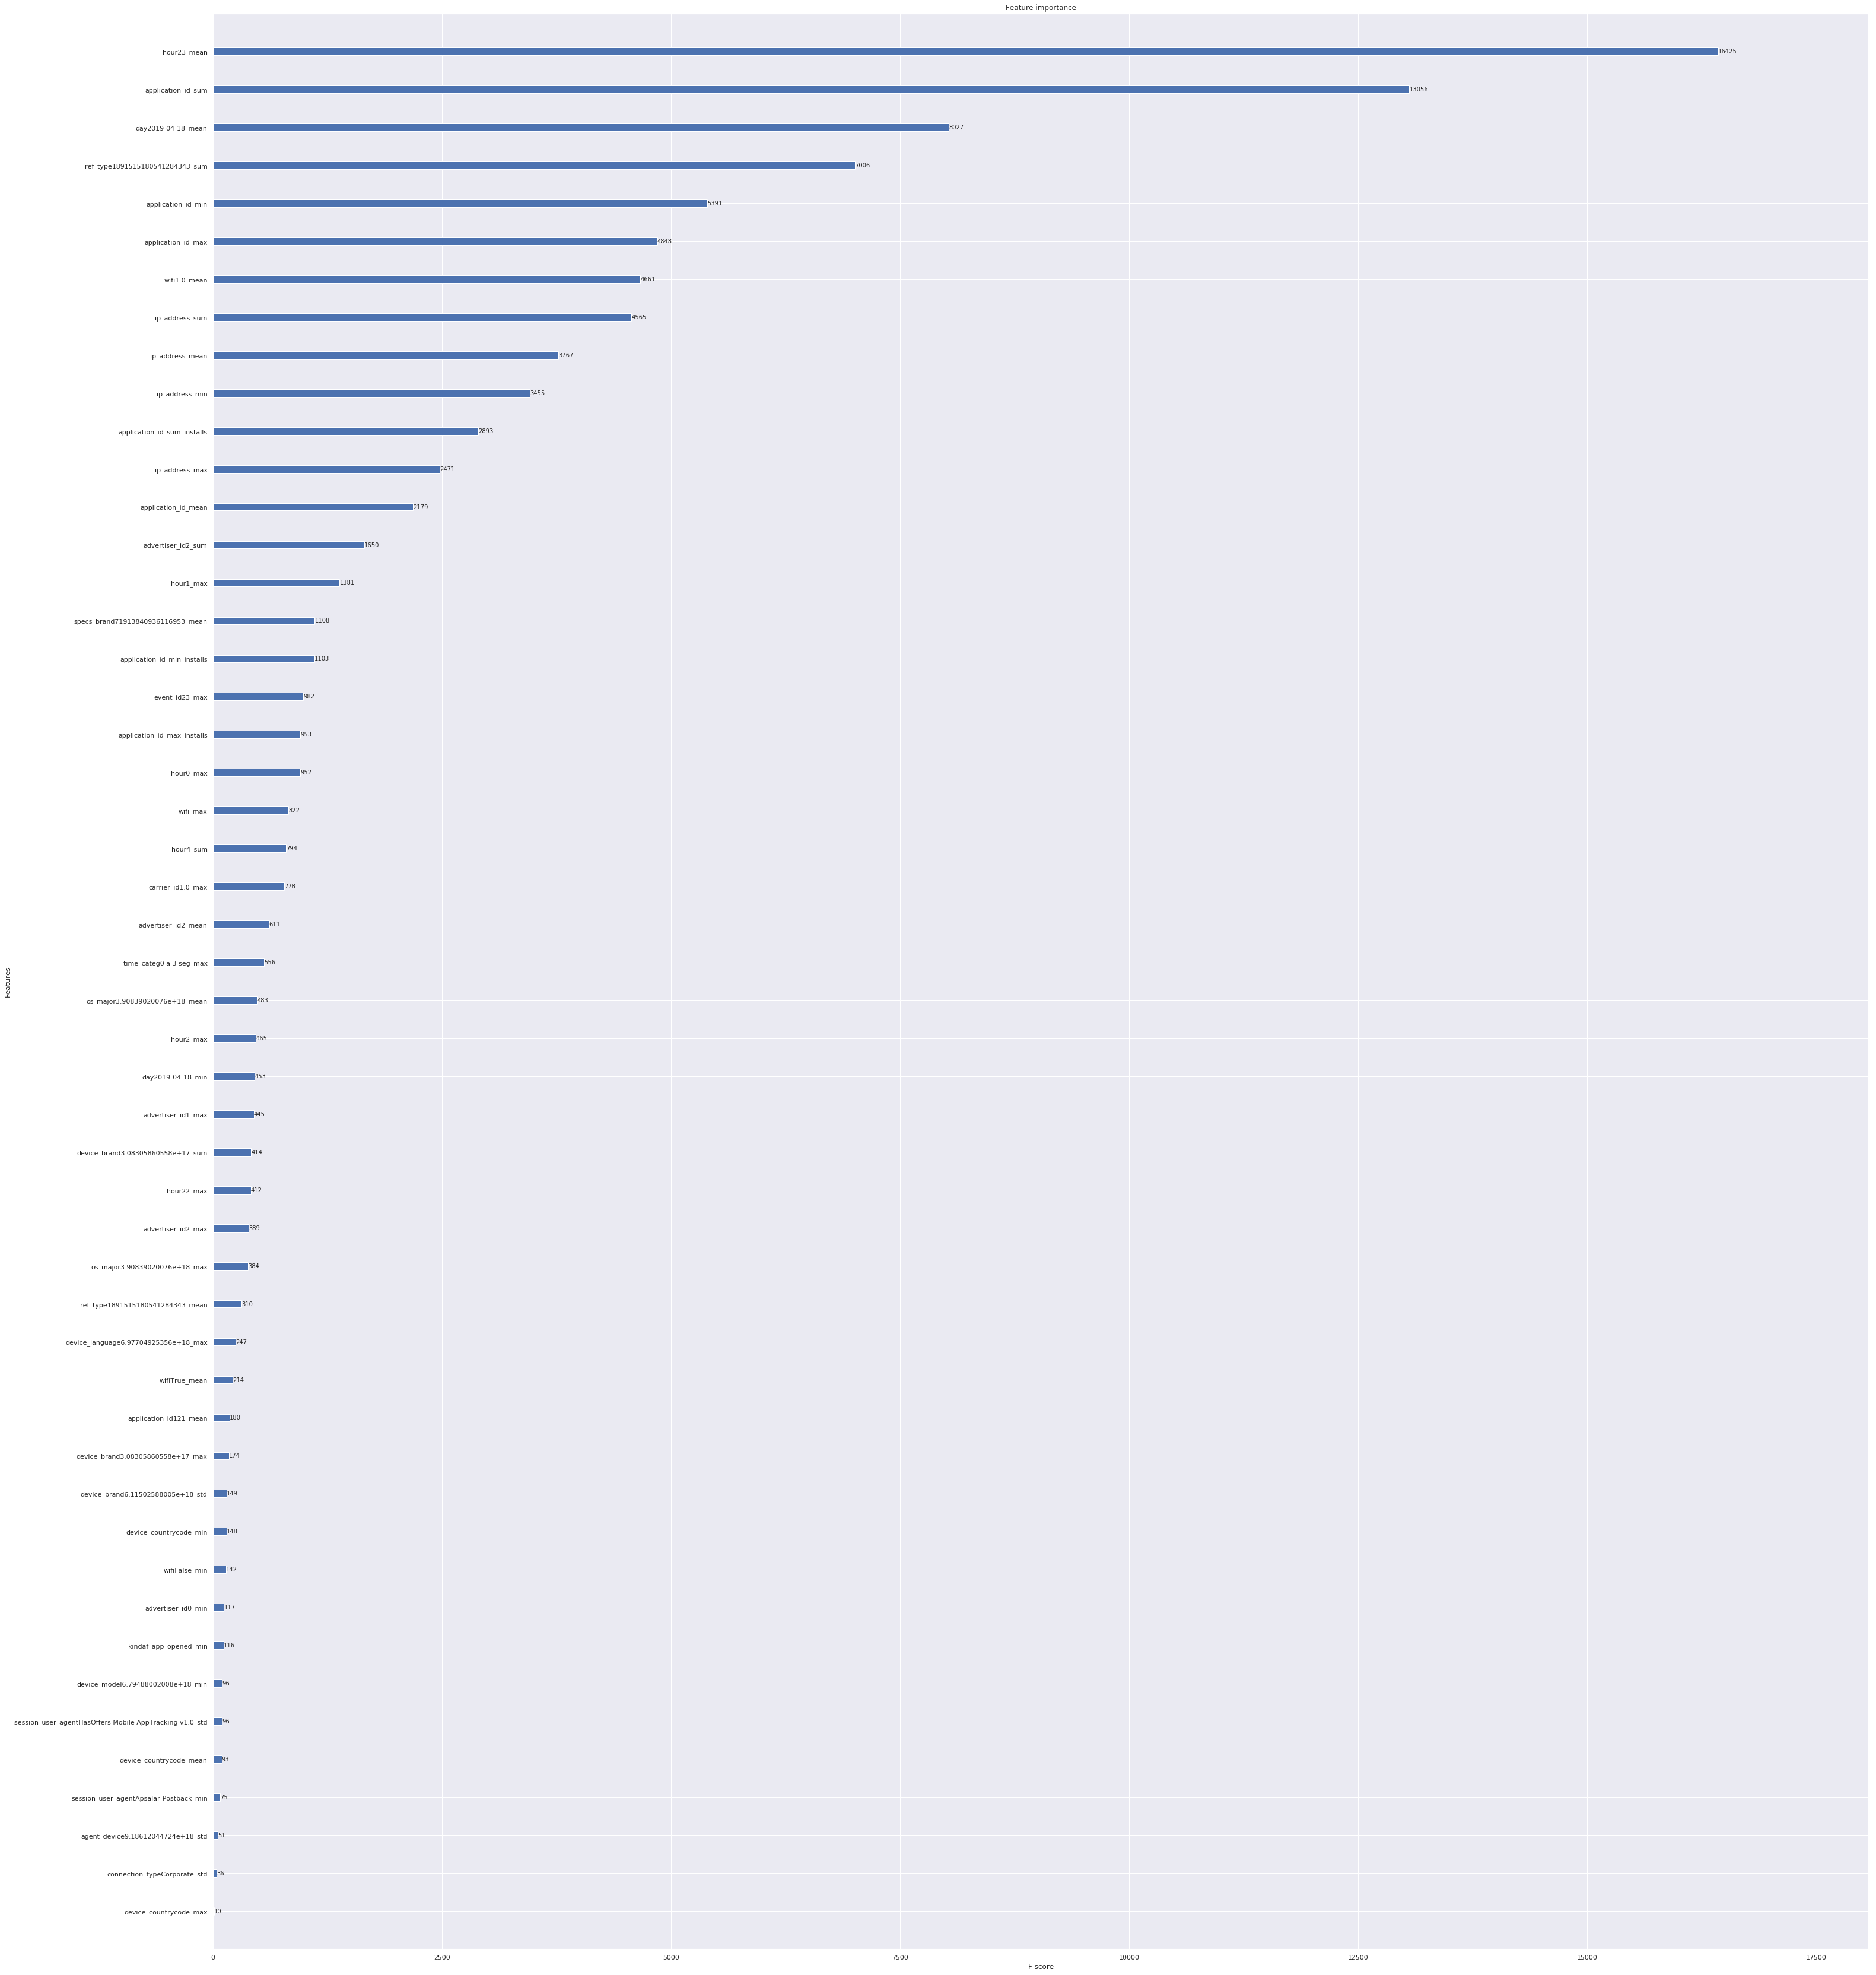

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(50, 60))
xgb.plot_importance(xg_reg, ax=ax)
plt.show()

In [10]:
ventana7 = pd.read_csv('../xgb/target_set_sc.csv').set_index('ref_hash')
features_ventana7 = ventana7.iloc[:,:-1]
labels_ventana7 = ventana7.iloc[:,-1]

In [11]:
predicted_target_labels = xg_reg.predict(features_ventana7)

In [12]:
target = pd.read_csv('../xgb/base_target_sc.csv').set_index('ref_hash')
target['obj'] = predicted_target_labels

In [13]:
target=target.sort_values(by='obj')

In [14]:
target.to_csv('../xgb/target_sc.csv')